# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Today's date for plots
today = str(date.today())

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:
def get_current_weather(city, api_key):

    url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        "appid": api_key,
        "q": city
    }
    
    r = requests.get(url, params=payload)

    if r.status_code == 200:
        return r.json()
    else:
        None

In [6]:
city_data = []

print('Beginning Data Retrieval\n-----------------------------')
i = 1

for city in cities:
    result = get_current_weather(city, api_key)
    if result:
        print("Processing Record " + str(i) + " of Unique Set | " + city)
        i += 1
        city_data.append(result)
    else:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Unique Set | mayumba
Processing Record 2 of Unique Set | florida
Processing Record 3 of Unique Set | lander
Processing Record 4 of Unique Set | half moon bay
Processing Record 5 of Unique Set | toora-khem
Processing Record 6 of Unique Set | mataura
Processing Record 7 of Unique Set | barrow
Processing Record 8 of Unique Set | kenai
City not found. Skipping...
Processing Record 9 of Unique Set | hanover
Processing Record 10 of Unique Set | richards bay
City not found. Skipping...
Processing Record 11 of Unique Set | dikson
Processing Record 12 of Unique Set | yulara
Processing Record 13 of Unique Set | sitka
Processing Record 14 of Unique Set | pankovka
Processing Record 15 of Unique Set | niono
Processing Record 16 of Unique Set | avarua
Processing Record 17 of Unique Set | albany
Processing Record 18 of Unique Set | hambantota
Processing Record 19 of Unique Set | te anau
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df = pd.DataFrame([{
    'Name': d['name'],
    'Cloudiness': d['clouds']['all'],
    'Country': d['sys']['country'],
    'Date': d['dt'],
    'Humidity': d['main']['humidity'],
    'Lat': d['coord']['lat'],
    'Lng': d['coord']['lon'],
    'Temp': d['main']['temp_max'],
    'Wind': d['wind']['speed']
} for d in city_data])

df.head(10)

,Cloudiness,Country,Date,Humidity,Lat,Lng,Name,Temp,Wind
0,100,GA,1578433809,77,-3.44,10.65,Mayumba,300.42,2.04
1,0,UY,1578433809,22,-34.10,-56.21,Florida,300.87,3.67
2,1,US,1578433810,51,42.83,-108.73,Lander,278.71,4.10
3,20,US,1578433810,76,37.46,-122.43,Half Moon Bay,288.15,7.20
4,2,RU,1578433810,95,52.47,96.11,Toora-Khem,249.91,0.04
5,92,NZ,1578433774,73,-46.19,168.86,Mataura,286.48,2.68
6,0,AR,1578433805,25,-38.31,-60.23,Barrow,301.27,1.68
7,90,US,1578433666,83,60.55,-151.26,Kenai,253.71,1.50
8,91,DE,1578433811,75,52.37,9.74,Hanover,280.37,4.60
9,96,ZA,1578433651,82,-28.77,32.06,Richards Bay,298.60,5.66


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

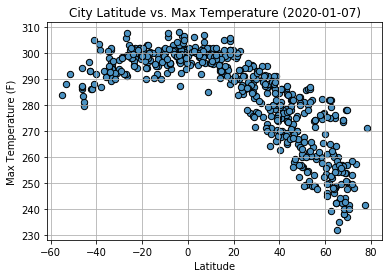

In [8]:
df.plot(x= 'Lat', y='Temp', kind='scatter', s=40, color = '#4B92C2', edgecolor='black', grid=True)
plt.title("City Latitude vs. Max Temperature (" + today + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the Figure
plt.savefig("lat_vs_temp.png", dpi=100)

# Show the Figure
plt.show()

#### Plot Analysis

It's pretty clear from this plot that the closer you get to the ecuator the hotter it gets. Interestingly, some cities south of the Ecuator (e.g. Griffith, AU) can even get hotter, whereas north of the Ecuador it doesn't seem to ever be the case.

#### Latitude vs. Humidity Plot

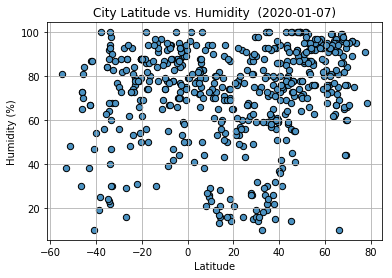

In [9]:
df.plot(x= 'Lat', y='Humidity', kind='scatter', s=40, color = '#4B92C2', edgecolor='black', grid=True)
plt.title("City Latitude vs. Humidity  (" + today + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the Figure
plt.savefig("lat_vs_humidity.png", dpi=100)

# Show the Figure
plt.show()

#### Plot Analysis

From this sample, there doesn't seem to be a strong correlation between humidity and proximity to the ecuator. In fact, there seems to be a slightly larger cluster of cities north of the ecuator with higher himidity percentage.

#### Latitude vs. Cloudiness Plot

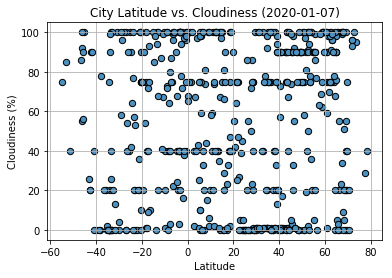

In [10]:
df.plot(x= 'Lat', y='Cloudiness', kind='scatter', s=40, color = '#4B92C2', edgecolor='black', grid=True)
plt.title("City Latitude vs. Cloudiness (" + today + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the Figure
plt.savefig("lat_vs_cloudiness.png", dpi=100)

# Show the Figure
plt.show()

#### Plot Analysis

From this sample—as of today—we can observse several clusters cloudiness across different latitudes. One of the most visible ones is at the level of the ecuator—and north of it—where you can see that skies are pretty clear.

#### Latitude vs. Wind Speed Plot

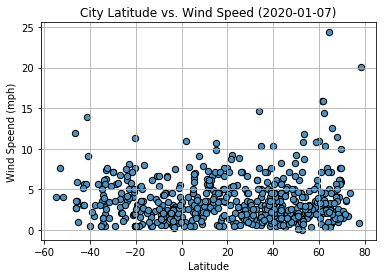

In [11]:
df.plot(x= 'Lat', y='Wind', kind='scatter', s=40, color = '#4B92C2', edgecolor='black', grid=True)
plt.title("City Latitude vs. Wind Speed (" + today + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speend (mph)")

# Save the Figure
plt.savefig("lat_vs_wind.png", dpi=100)

# Show the Figure
plt.show()

#### Plot Analysis

From this sample—as of today—there doesn't seem to be a correlation between latitude and wind speed. In fact, most cities fall underneath the 5mph threshold, regardless of the latitude.